# Simulation of a positron-induced Muon Source

## Laboratory of Computational Physics mod. A @ Phisics of Data, University of Padova

__Authors:__

- Clara Eminente (University of Padova)
- Alberto Chimenti (University of Padova)
- Matteo Guida (University of Padova)

__Supervised by:__

- Professor Marco Zanetti (University of Padova, CERN)
- Camilla Curatolo (University of Padova)

## Description
The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. <br>
A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process: <br><br> $$e^+ + e^- \rightarrow \mu^+ + \mu^-$$ <br>
To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). <br> The main goal of this project is to produce a Monte Carlo simulation of such a process.

# Cross section and angular distribution

***
* Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the center of mass energy $\sqrt{s}$ as a parameter. <br> Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$). 

* Compute and display the angle and momentum components distributions of the emerging muon pairs.
***

<img src="img/Scattering.png" width="600">


\begin{equation}\label{eq:}
\left ( \frac{d\sigma}{d\Omega}\right)_{CoM}= \frac{\alpha^2}{16E^6}\frac{|\vec{p'}|}{|\vec{p}|}\left(E^4+(\vec{k} \cdot \vec{p})+E^2(m_e^2+m_\mu^2)^2\right)
\end{equation}
<br>
<br>
Replacing the relationships and making the approximation $m_{e}= 0$ in fact $E^2 >> m^2_{e}$
<br>
<br>
<br>
$$
\boxed{\left ( \frac{d\sigma}{d\Omega}\right)_{CoM}= \frac{\alpha^2}{4s} \sqrt{1- \frac{4 m^2_{\mu}}{s} } \left [ \left (1 + \frac{4m_{\mu}^2}{s}\right) + \left (1 - \frac{4m_{\mu}^2}{s}\right)cos^2\theta \right]}
$$
<br>
<br>
$$\sigma_{TOT}=\int_{0}^{2\pi}d\phi\int_{0}^{\pi}\sin(\theta) \left (\frac{d\sigma }{d \Omega}\right) d\theta=\frac{4\pi\alpha^{2}}{3s}\sqrt{1- \frac{4 m^2_{\mu}}{s} }\Big(1+\frac{2m_{\mu}^{2}}{s} \Big)$$
<br>


One could find the Probability Density Distribution for the scattering angle as:
$$P(\theta)=\int^{2\pi}_{0}d\phi sen\theta\frac{d\sigma}{d\Omega}$$

Which yields the following normalized version:
$$\boxed{\rho(\theta)=\frac{P(\theta)}{\int d\theta P(\theta)}=\frac{\int^{2\pi}_{0}d\phi sen\theta \frac{d\sigma}{d\Omega}}{\int^{2\pi}_{0}d\phi\int^{\pi}_{0}sen\theta d\theta \frac{d\sigma}{d\Omega}}= \frac{1}{\sigma_{TOT}} \left(\frac{d\sigma}{d\theta} \right)}$$
<br>
<br>
Here the $\sigma_{TOT}$ plays the role of the normalization constant hence it is equivalent, as expected, to the integral of the probability distribution $P(\theta)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import time
from scipy.optimize import brentq
import math as math
import numpy.linalg as linalg

%matplotlib inline

In [2]:
# Physical costants
electron_charge = 1.602176634e-19 # C
speed_of_light = 299792458 # m/s
alpha = 0.007297 # dimensionless
muon_mass = 0.105658374524 #GeV
electron_mass = 0.0005109989461 # GeV
E_exp=2*muon_mass + 0.005
print("The energy in CoM is", E_exp , "GeV")

The energy in CoM is 0.216316749048 GeV


In [3]:
# Conversion constants
conversion0 = 0.389379e6 #1/GeV --> nanoBarn
conversion1 = (5.34*10**(-19)) #Gev/c ---- > kg*m/s (momentum)
conversion2 = (1.78*10**(-27)) #Gev/c^2 -------> kg (mass)

In [4]:
def total_cross_section_nb(s):
    return (((alpha**2)*np.pi*4/(3*s))*np.sqrt(1-(4*muon_mass**2/s))*(1+(2*muon_mass**2)/s))*conversion0

def differential_cross_section_nb(theta, s=E_exp**2): #rads
    return (((alpha**2)*np.pi*2/(4*s))*np.sqrt(1-(4*muon_mass**2/s))*((1+(4*muon_mass**2/s))+(1-(4*muon_mass**2/s))*np.cos(theta)**2))*conversion0

def pdf_theta(theta, s=E_exp**2): #rads!
    return np.sin(theta)*differential_cross_section_nb(theta, s)

print('Total cross section = ', total_cross_section_nb(E_exp**2))
cost_norm_theta = integrate.quad(lambda theta: pdf_theta(theta),0,np.pi)
print('Normalization pdf = ', cost_norm_theta[0])

def pdf_theta_norm(theta, s=E_exp**2):
    # Rescale both the integration interval and the pdf values
    return (1/cost_norm_theta[0])*pdf_theta((theta*np.pi/180), s)*np.pi/180 

print("Verify normalization: ", integrate.quad(lambda theta: pdf_theta_norm(theta),0,180)[0])

Total cross section =  586.0378845408211
Normalization pdf =  586.0378845408212
Verify normalization:  0.9999999999999999


In [5]:
# Generic spanning for plotting use
E=np.arange(2*muon_mass, E_exp + 0.1,0.0001) #CoM + 0.1 to show high energy behaviour
s=np.power(E,2)
angles=np.arange(0,180,1)
angles_rad=angles*(np.pi/180)
cos_angles=np.cos(angles_rad)

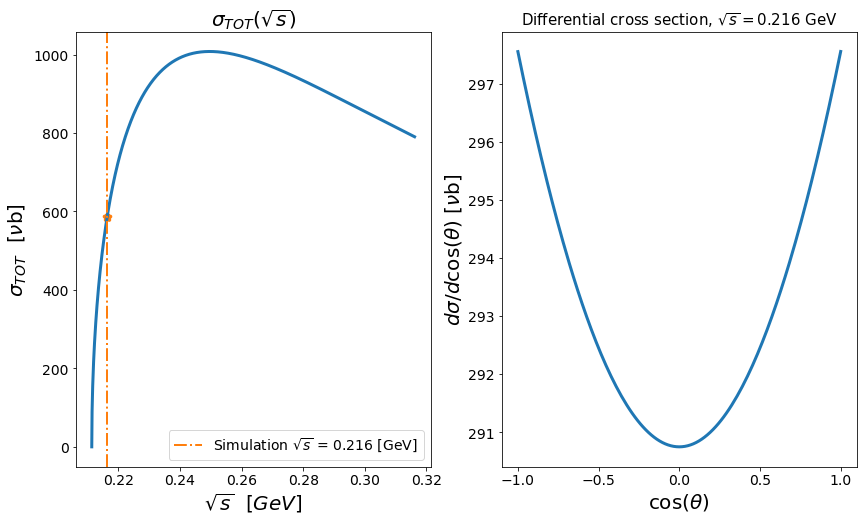

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].plot(E,total_cross_section_nb(s), linewidth=3)
ax[0].axvline(E_exp, color='C1', linestyle='-.', label=r'Simulation $\sqrt{s}$ = '+str(round(E_exp,3))+" [GeV]", linewidth=2)
ax[0].scatter(E_exp, total_cross_section_nb(E_exp**2), c='C1', marker='*', edgecolors='C1', linewidths=4)
ax[0].set_title(r'$\sigma_{TOT}(\sqrt{s}) $',fontsize=20)
ax[0].set_ylabel(r'$\sigma_{TOT} $'+ r"  [$\nu$b]",fontsize=20)
ax[0].set_xlabel(r'$\sqrt{s} \,\,\,\, [GeV]$',fontsize=20)
ax[0].tick_params(labelsize=14); ax[0].legend(fontsize=14)

ax[1].plot(cos_angles,differential_cross_section_nb(angles_rad), linewidth=3)
ax[1].set_title(r'Differential cross section, $\sqrt{s}=$'+str(round(E_exp,3))+ " GeV ",fontsize=15)
ax[1].set_ylabel(r'$d\sigma/d\cos{(\theta)}$ [$\nu$b]',fontsize=20)
ax[1].set_xlabel(r'$\cos(\theta)$',fontsize=20)
ax[1].tick_params(labelsize=14)

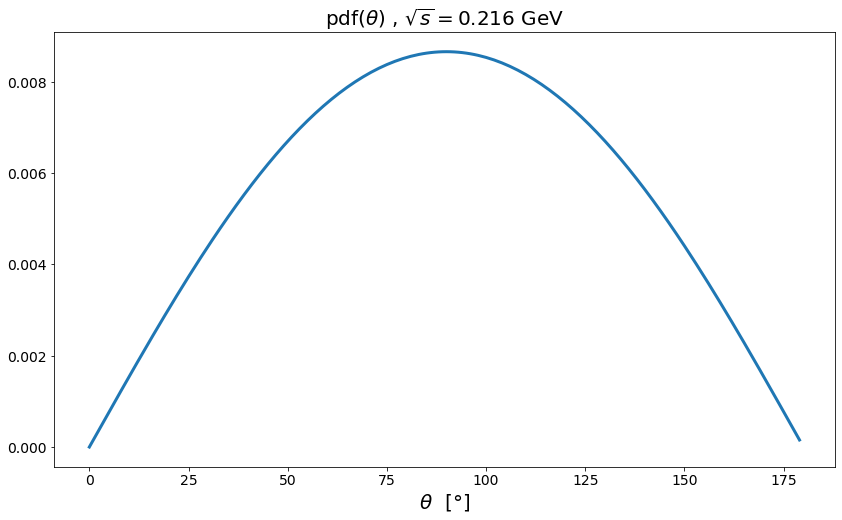

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(angles,pdf_theta_norm(angles), linewidth=3)
ax.set_title(r'pdf($\theta$) , $\sqrt{s}=$'+str(round(E_exp,3))+ " GeV ",fontsize=20)
ax.set_xlabel(r'$ \theta \,\,\,\, [°]$',fontsize=20)
ax.tick_params(labelsize=14)

## Monte Carlo

***
* Write a Monte Carlo simulation that generates scattering events following the distributions that you find analytically.
***

In [8]:
N_simulated = 2*10**6

### > HIT or MISS

One simply samples uniformly from a rectangular distribution and then retains only the points underlying the desired distribution.

In [9]:
def hit_or_miss(distribution,iterations,extremes):
    '''extremes is an array with four elemets xa, xb, ya, yb'''
    xa = extremes[0]; xb = extremes[1]
    ya = extremes[2]; yb = extremes[3]
    
    point_x = np.random.uniform(xa, xb, iterations)
    point_y = np.random.uniform(ya, yb, iterations)
    args = np.argwhere(distribution(point_x) >= point_y)
    
    out = point_x[args].T[0]
    out_y = point_y[args].T[0]
    
    return out #Converts from radiants to degrees

In [10]:
file_time_HM = "data/time_HM_"+str(N_simulated)+".npy"
file_data_HM = "data/theta_samples_HM_"+str(N_simulated)+".npy"

In [11]:
#np.random.seed(311)
start = time.time()
theta_samples= hit_or_miss(pdf_theta_norm,N_simulated, (0,180,0,0.01))
end = time.time()
#saving time and samples
np.save(file_time_HM, round(end - start,3))
np.save(file_data_HM, theta_samples)

In [12]:
# Loading data and Cpu-time results
time_HM = np.load(file_time_HM)
theta_samples = np.load(file_data_HM )

print("Execution time: ",time_HM, "sec for ",N_simulated, "iterations")
print("Accepted ratio:", len(theta_samples)/N_simulated)

Execution time:  0.14 sec for  2000000 iterations
Accepted ratio: 0.555352


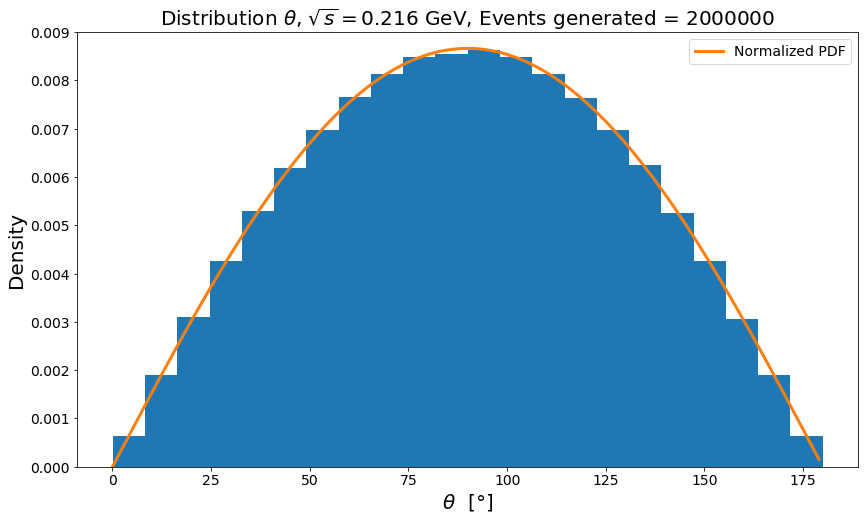

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(theta_samples,bins='doane',density=True)
ax.plot(angles,pdf_theta_norm(angles),color='C1', linewidth=3,label="Normalized PDF")
ax.set_title(r'Distribution $\theta$, $\sqrt{s}=$'+str(round(E_exp,3))+ " GeV, Events generated = "+ str(N_simulated),fontsize=20)
ax.set_xlabel(r'$ \theta \,\,\,\, [°]$',fontsize=20)
ax.legend(fontsize=14)
ax.set_ylabel(r'Density',fontsize=20)
ax.set_ylim(0,0.0090)
ax.tick_params(labelsize=14)

### > METROPOLIS

In [14]:
def metropolis_hastings(distribution, iterations, s=E_exp**2):
    theta = 0.1
    samples = []
    accepted = 0

    for i in range(iterations):
        theta_star = np.random.normal(theta,8) #proposal distribution
        ratio = (distribution(theta_star, s) / distribution(theta, s))
        if (np.random.uniform(0,1,1) <= ratio):
            theta = theta_star
            accepted +=1
        samples.append(theta)

    return np.asarray(samples),accepted

In [15]:
file_time_MET = "data/time_MET_"+str(N_simulated)+".npy"
file_data_MET = "data/theta_samples_MET_"+str(N_simulated)+".npy"

In [16]:
start = time.time()
theta_samples, accepted=metropolis_hastings(pdf_theta_norm,N_simulated)
end = time.time()
#saving time and samples
np.save(file_time_MET, round(end - start,3))
np.save(file_data_MET, theta_samples)
np.save("data/accepted.npy", accepted)

In [17]:
# Loading data and Cpu-time results
time_MET = np.load(file_time_MET)
theta_samples = np.load(file_data_MET)
accepted = np.load("data/accepted.npy")

print("Execution time : ",time_MET, "sec for ",N_simulated, "  iterations")
print("Accepted ratio:", len(np.unique(theta_samples))/N_simulated) #len(np.unique(theta_samples)) is equivalent to the accepted number

Execution time :  23.005 sec for  2000000   iterations
Accepted ratio: 0.9447465


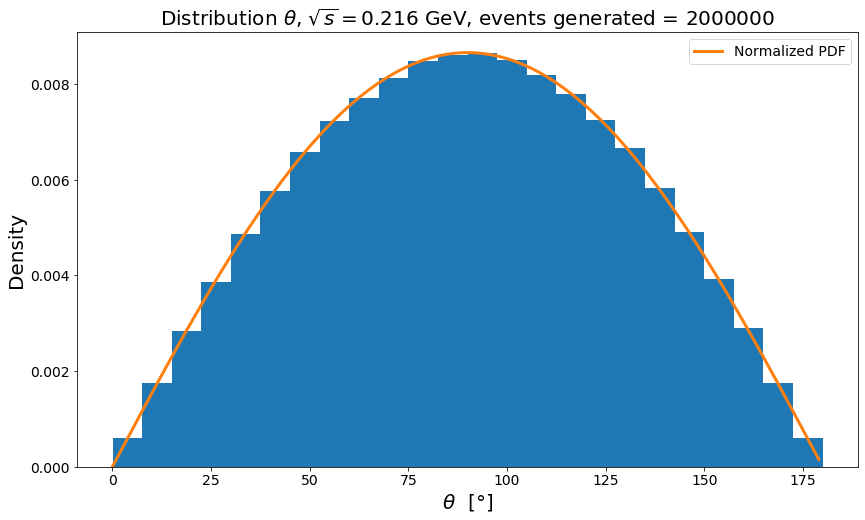

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(theta_samples,bins='doane',density=True)
ax.plot(angles,pdf_theta_norm(angles),color='C1', linewidth=3,label="Normalized PDF")
ax.set_title(r'Distribution $\theta$, $\sqrt{s}=$'+str(round(E_exp,3))+ " GeV, events generated = "+ str(N_simulated),fontsize=20)
ax.set_xlabel(r'$ \theta \,\,\,\, [°]$',fontsize=20)
ax.legend(fontsize=14)
ax.set_ylabel(r'Density',fontsize=20)
ax.tick_params(labelsize=14)

### > INVERSE SAMPLING

Compute the Cumulative Distribution Function (CDF), defined as:
<br>
$$CDF(x)=\int^{x}_{0}\rho(x)dx$$
<br>
It is defined as the total probability of extracting a value smaller than x from the distribution $\rho(x)$, thus:

<br>
$$CDF(x)=y \;\;\;\;\;\; \Rightarrow \;\;\;\;\;\; x=CDF^{-1}(y)$$
<br>
Such a procedure would involve the inversion of the CDF which is not trivial. An alternative "trick" is to find the zeros of:
<br>
<br>
$$CDF(x) - y$$
where y is sampled from a uniform distribution.

The CDF was computed analitically and the zeros were found via the function $\textbf{brentq}$ from scipy library

$$CDF(\theta) = -\frac{\pi\alpha^2}{2s} \sqrt{1- \frac{4 m^2_{\mu}}{s} } \left [ \left (1 + \frac{4m_{\mu}^2}{s}\right)cos\theta + \frac{1}{3}\left (1 - \frac{4m_{\mu}^2}{s}\right)cos^3\theta - \frac{4}{3}\left(1 - \frac{2m_{\mu}^2}{s}\right) \right]$$

In [19]:
#potentially useless

def pdf_cos(z, s=E_exp**2):#- comes from sin(theta)d(theta) = -d(cos(theta))= -dz
    return(((alpha**2)*np.pi*2/(4*s))*np.sqrt(1-(4*muon_mass**2/s))*((1+(4*muon_mass**2/s))+(1-(4*muon_mass**2/s))*z**2))*0.389379e6

cost_norm_cos =integrate.quad(lambda z: pdf_cos(z),-1,1)

def pdf_cos_norm(z,s=E_exp**2):
    return pdf_cos(z,s)/cost_norm_z[0]

In [20]:
# Generic spanning for plotting use
E=np.arange(2*muon_mass, E_exp + 0.1,0.0001) #CoM + 0.1 to show high energy behaviour
s=np.power(E,2)
angles=np.arange(0,180,1)
angles_rad=angles*(np.pi/180)
cos_angles=np.cos(angles_rad)

In [21]:
def cdf_zeros(y,x,s):
    cost = ((alpha**2)*np.pi*2/(4*s))*np.sqrt(1-(4*muon_mass**2/s))*conversion0
    norm_cost = total_cross_section_nb(s)
    return(- cost/(norm_cost))*( 1/3*(1-(4*muon_mass**2/s))*y**3 + \
                                (1+(4*muon_mass**2/s))*y - 4/3*(1 + 2*muon_mass**2/s) ) - x

#plt.plot(cos_angles, cdf_zeros(cos_angles, 0, s=E_exp**2))
#plt.show()

In [22]:
file_time_IS = "data/time_IS_"+str(N_simulated)+".npy"
file_data_IS = "data/theta_samples_IS_"+str(N_simulated)+".npy"

In [23]:
#np.random.seed(311)
x_samples = np.random.uniform(0,1,N_simulated)
start = time.time()
z = [brentq((cdf_zeros),-1,1,args=(x,s)) for x,s in zip(x_samples,[E_exp**2]*N_simulated)]
end = time.time()

np.save(file_time_IS, round(end - start,3))
np.save(file_data_IS, z)

In [24]:
z = np.load(file_data_IS)
time_IS = np.load(file_time_IS)

print("Time: ",time_IS, "  sec for ",N_simulated, "  iterations")

Time:  43.25   sec for  2000000   iterations


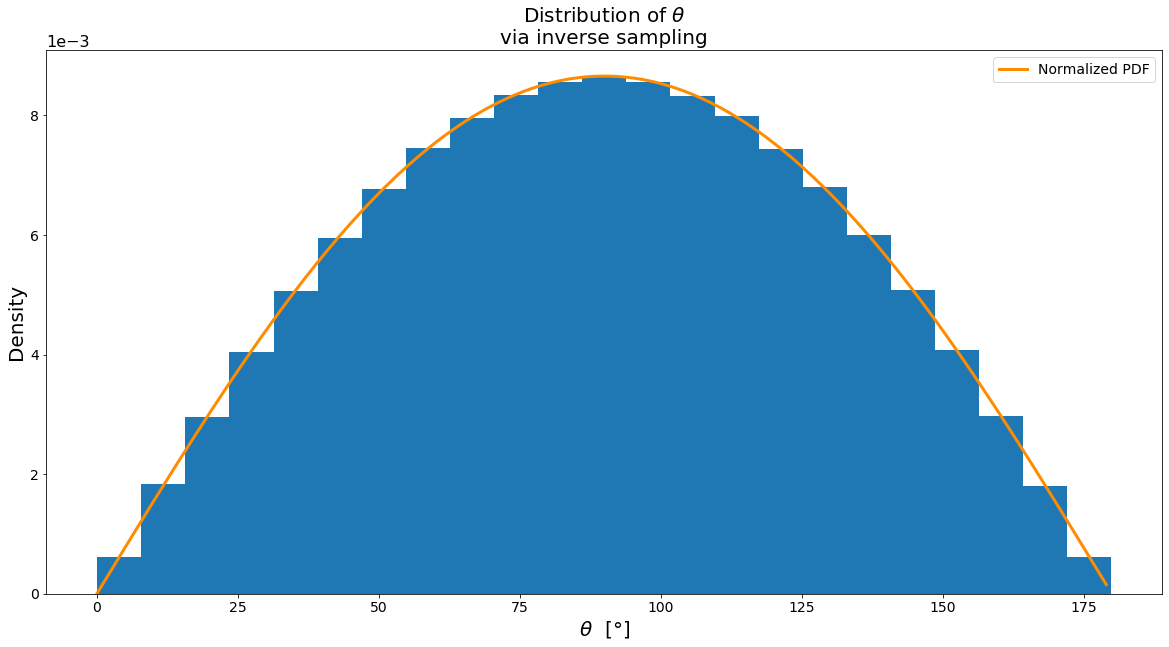

In [25]:
# To decide the number of bins we used Doane's formula.
# This is an improvement of Sturges' formula, which is derived from a binomial distribution and
# bases the bin sizes, to adapt to non-normal data.
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(180*np.arccos(z)/np.pi,bins='doane',density=True)
ax.plot(angles,pdf_theta_norm(angles),color='darkorange', linewidth=3,label="Normalized PDF")
ax.set_title(r'Distribution of $\theta$'+'\nvia inverse sampling',fontsize=20)
ax.legend(fontsize=14)
ax.ticklabel_format(style='sci',scilimits=(-3,3))
ax.set_ylabel(r'Density',fontsize=20)
ax.set_xlabel(r'$ \theta \,\,\,\, [°]$',fontsize=20)
ax.tick_params(labelsize=14)
ax.yaxis.get_offset_text().set_fontsize(16)
plt.show()

### Comparison of inverse sampling data with Babayaga output

[BabaYaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) is a Monte Carlo event generator for $e^+e^- --> e^+e^-, μ^+μ^-, γγ$ and $π^+π^-$ processes at flavour factories, i.e. for energies below 10-12 GeV, it has been developed at the INFN center of Pavia by  C.M. Carloni Calame, G. Montagna, O. Nicrosini, F. Piccinini.

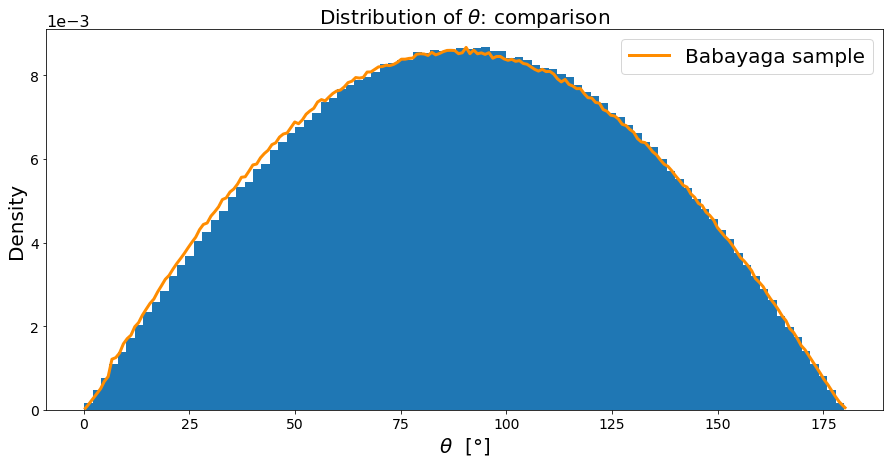

In [26]:
Babayaga = np.loadtxt("matched_el_th_exp_200.txt").T
theta_samples=np.arccos(np.load(file_data_IS))*180/np.pi
fig, ax = plt.subplots(1,1, figsize=(15,7))
counts, bins, pathces= ax.hist(theta_samples, bins=90,density=True)
k=np.max(Babayaga[1])/np.max(counts)
centers = [ Babayaga[0][i]+(Babayaga[0][i+1]-Babayaga[0][i])/2 for i in np.arange(0,len(Babayaga[0])-1)]
centers.append(Babayaga[0][-1]+(Babayaga[0][-1]-Babayaga[0][-2]))
ax.plot(centers,Babayaga[1]/k,color='darkorange', linewidth=3, label="Babayaga sample")
ax.set_title(r'Distribution of $\theta$: comparison',fontsize=20)
ax.legend(fontsize=20)
ax.ticklabel_format(style='sci',scilimits=(-3,3))
ax.set_ylabel(r'Density',fontsize=20)
ax.set_xlabel(r'$ \theta \,\,\,\, [°]$',fontsize=20)
ax.tick_params(labelsize=14)
ax.yaxis.get_offset_text().set_fontsize(16)
plt.show()

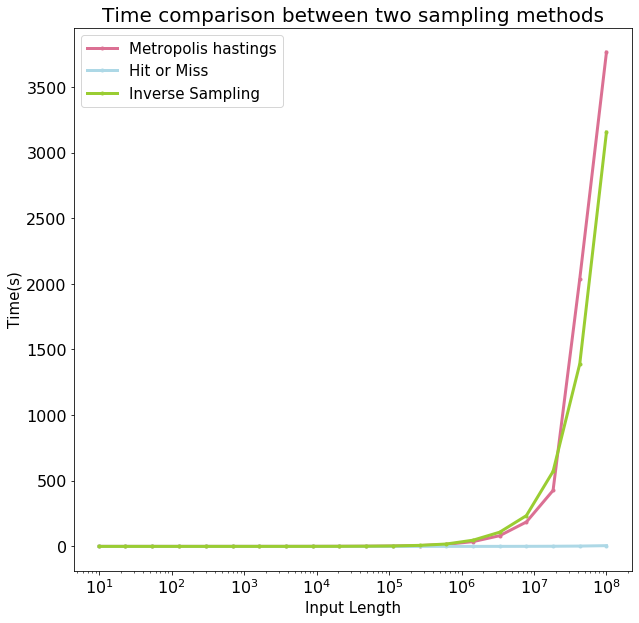

In [27]:
saved_timeMet = np.load("data/timeMet.npy")
saved_timeHM = np.load("data/timeHM.npy")
saved_timeIS = np.load("data/timeIS.npy")
list_of_Nentries = np.logspace(1,8,20, dtype=int)


#list_of_Nentries = 10**(list_of_Nentries)


fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.plot(list_of_Nentries, saved_timeMet, ".-", color="palevioletred", label="Metropolis hastings",linewidth=3)
ax.plot(list_of_Nentries, saved_timeHM, ".-", color="lightblue", label="Hit or Miss",linewidth=3)
ax.plot(list_of_Nentries, saved_timeIS, ".-", color="yellowgreen", label="Inverse Sampling",linewidth=3)
ax.legend(loc="best", fontsize=15)
ax.tick_params(labelsize=16)
ax.set_ylabel("Time(s)", fontsize=15)
ax.set_xlabel("Input Length", fontsize=15)
ax.set_title("Time comparison between two sampling methods", fontsize=20)
ax.set_xscale("log")
plt.show()

## Computing corresponding momenta

In [28]:
# Redefine the parameters matching the actual sample size 
# (useful when using hit-or-miss since the output sample size doesn't match the number of draws)
N_samples=len(theta_samples)
phi_samples = 360*np.random.random(N_samples)

In [29]:
%precision 6
momenta=pd.DataFrame(columns=['Anti_muon px','Anti_muon py','Anti_muon pz','Muon px','Muon py','Muon pz'])
p_1 = np.sqrt(E_exp**2/4 - muon_mass**2)
print("Modulus momentum: ", p_1, "GeV")

Modulus momentum:  0.023120161604539013 GeV


In [30]:
momenta['Anti_muon_px'] = p_1*np.cos(phi_samples*(np.pi/180))*np.sin(theta_samples*(np.pi/180))
momenta['Anti_muon_py'] = p_1*np.sin(phi_samples*(np.pi/180))*np.sin(theta_samples*(np.pi/180))
momenta['Anti_muon_pz'] = p_1*np.cos(theta_samples*(np.pi/180))
momenta['Muon_px'] = - momenta['Anti_muon_px']
momenta['Muon_py'] = - momenta['Anti_muon_py']
momenta['Muon_pz'] = - momenta['Anti_muon_pz']
momenta.to_csv("data/Momenta_CoM.csv", index=False, index_label=False)

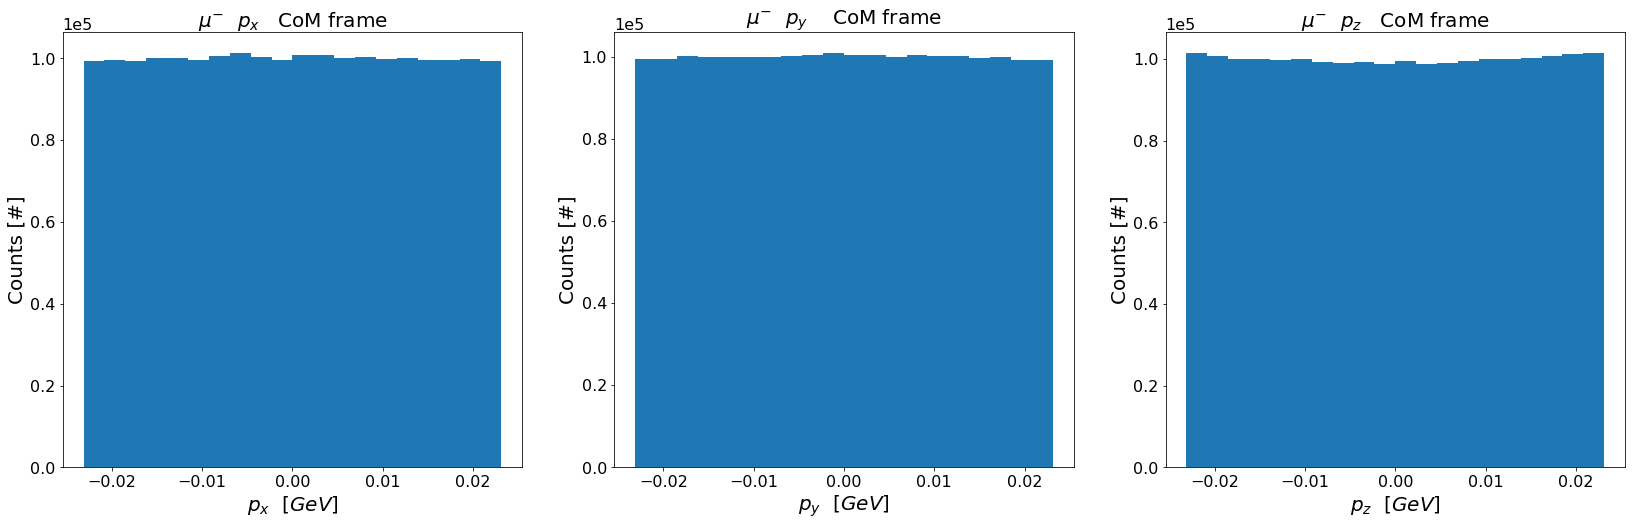

In [31]:
momenta = pd.read_csv("data/Momenta_CoM.csv")

fig, ax = plt.subplots(1,3, figsize=(28,8))
ax[0].hist(momenta['Muon_px'], bins=20)
ax[0].set_title(r'$\mu^{-}  \,\,\,\, p_{x} $   CoM frame',fontsize=20)
ax[0].set_ylabel(r"Counts [#]",fontsize=20)
ax[0].set_xlabel(r'$p_{x} \,\,\,\, [GeV]$',fontsize=20)
ax[0].tick_params(labelsize=16)
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0].yaxis.get_offset_text().set_fontsize(16)

ax[1].hist(momenta['Muon_py'], bins=20)
ax[1].set_title(r'$\mu^{-}  \,\,\,\, p_{y}$    CoM frame',fontsize=20)
ax[1].set_ylabel(r"Counts [#]",fontsize=20)
ax[1].set_xlabel(r'$p_{y} \,\,\,\, [GeV]$',fontsize=20)
ax[1].tick_params(labelsize=16)
ax[1].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1].yaxis.get_offset_text().set_fontsize(16)

ax[2].hist(momenta['Muon_pz'], bins=20)
ax[2].set_ylabel(r"Counts [#]",fontsize=20)
ax[2].set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax[2].set_title(r'$\mu^{-}  \,\,\,\, p_{z} $   CoM frame',fontsize=20)
ax[2].tick_params(labelsize=16)
ax[2].ticklabel_format(style='sci',scilimits=(-3,3))
ax[2].yaxis.get_offset_text().set_fontsize(16)

## Boost muons four-momenta distributions in the laboratory frame.

[PDG Kinematics](http://pdg.lbl.gov/2019/reviews/rpp2018-rev-kinematics.pdf)

$$\begin{bmatrix} E' \\ p_x' \\ p_y' \\ p_z' \end{bmatrix} = \begin{bmatrix} \gamma&0&0&-\beta \gamma\\
0&1&0&0\\
0&0&1&0\\
-\beta \gamma&0&0&\gamma\\
\end{bmatrix} \begin{bmatrix}
E \\ p_x \\ p_y \\ p_z
\end{bmatrix}= \begin{bmatrix}
E\gamma-\gamma\beta p_z \\ p_x \\ p_y \\ \gamma p_z -\gamma \beta E 
\end{bmatrix}
$$
<br>
In the present case (CoM $\longrightarrow$ LAB) the relative velocity between the two frames of reference is $-v_z$: we are considering that the scattering happens along the z axis, so that all of their momentum is directed in that direction. <br>
<br>

$$\beta =  - \frac{v_z}{c}= - v_z = -  \frac{p_z}{E} = - \frac{\sqrt{E^2-m^2_e}}{E} = - \sqrt{1- \frac{m^2_e}{E^2}} = - \sqrt{ 1 -  \frac{4 m^2_e}{s} }$$


$$\gamma = \frac{1}{\sqrt{1-\beta^2}}$$

In [32]:
beta = - np.sqrt( 1. - ((2*electron_mass)**2)/E_exp**2 )
gamma = 1./np.sqrt(1-beta**2)
print("Beta factor: ", beta)
print("Gamma factor: ", gamma)

Beta factor:  -0.9999888392820437
Gamma factor:  211.6606606515514


In [33]:
momenta_lab=pd.DataFrame(columns=['Anti_muon_px_lab','Anti_muon_py_lab','Anti_muon_pz_lab','Muon_px_lab','Muon_py_lab','Muon_pz_lab'])
momenta_lab['Anti_muon_px_lab'] = momenta['Anti_muon_px']
momenta_lab['Anti_muon_py_lab'] = momenta['Anti_muon_py']
momenta_lab['Anti_muon_pz_lab'] = gamma*momenta['Anti_muon_pz'] - beta*gamma*E_exp/2 
momenta_lab['Muon_px_lab'] = momenta['Muon_px']
momenta_lab['Muon_py_lab'] = momenta['Muon_py']
momenta_lab['Muon_pz_lab'] = gamma*momenta['Muon_pz'] - beta*gamma*E_exp/2
momenta_lab.to_csv("data/Momenta_Lab.csv", index=False, index_label=False)

We are only showing the new components of the momentum along z since the other two are not affected by the boost.

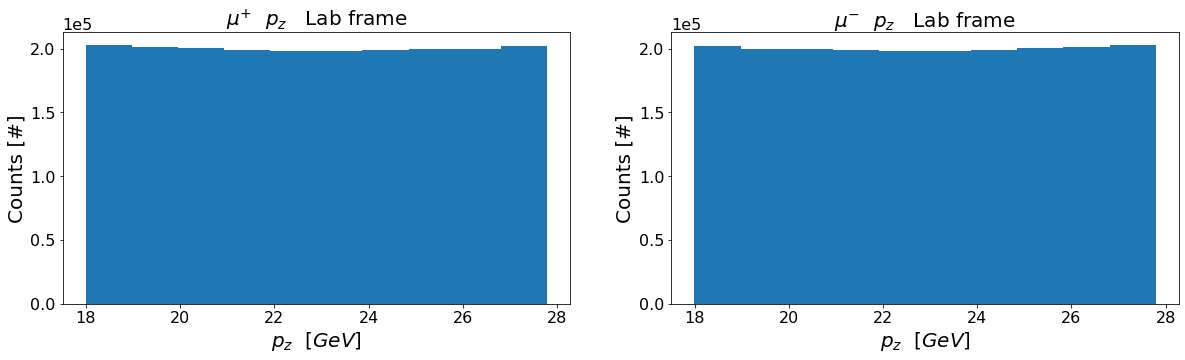

In [34]:
momenta_lab = pd.read_csv("data/Momenta_Lab.csv")

fig, (ax,ax1) = plt.subplots(1,2,figsize=(20,5))
ax.hist(momenta_lab['Anti_muon_pz_lab'])
ax.set_ylabel(r"Counts [#]",fontsize=20)
ax.set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax.set_title(r'$\mu^{+}  \,\,\,\, p_{z} $   Lab frame',fontsize=20)
ax.tick_params(labelsize=16)
ax.ticklabel_format(style='sci',scilimits=(-3,3))
ax.yaxis.get_offset_text().set_fontsize(16)

ax1.hist(momenta_lab['Muon_pz_lab'])
ax1.set_ylabel(r"Counts [#]",fontsize=20)
ax1.set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax1.set_title(r'$\mu^{-}  \,\,\,\, p_{z} $   Lab frame',fontsize=20)
ax1.tick_params(labelsize=16)
ax1.ticklabel_format(style='sci',scilimits=(-3,3))
ax1.yaxis.get_offset_text().set_fontsize(16)

# Realistic Target

***
* Assume a $6$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations.
***

The relationship can be found in [this](https://agenda.infn.it/event/15095/contributions/28458/attachments/20277/22980/04_LEMMA_formazione.pdf#page=13) presentation given by Mario Antonelli.

$$N(\mu^+\mu^-)=\sigma(e^+e^- \longrightarrow \mu^+\mu^-)N(e^+)\rho(e^-)L_{Be}$$
- $N(e^+) =$ number	of	$e^+$
- $N_{Be}(e^-) =$ number	of	$e^-$ per atom of Beryllium
- $\rho(e^-) =$ target	electron	density
- $L_{Be}$ = target	thickness	

$$\rho(e^-) = \frac{\rho_{Be}{N_A}}{M_{Be}}$$

- $N_A =$ Avogadro constant
- $M_{Be} =$ Beryllium molar mass
- $\rho_{Be} =$ Beryllium density

$$N(e^+)=\lambda_{e^+}T$$

- $\lambda_{e^+}$ = rate of positron
- T = time of the experiment

In [35]:
from decimal import Decimal
N_A = 6.02214076e23 # 1/mol
target_density = 1.848 # g/cm^3
target_molar_mass = 9.012182 # g/mol
thickness_target = 6 # cm 
e_atom_target=4 
rate_positron = 1e6 # 1/s
time_exp=60*60*24*7 # sec in a week

# 1e-33 because nbarn -> cm^2
N = total_cross_section_nb(E_exp**2)*1e-33*rate_positron*time_exp*e_atom_target*(target_density*N_A/target_molar_mass)*thickness_target

rescaling_factor = N/N_simulated

print(" Number of positrons : ","{:.2E}".format(Decimal(rate_positron*time_exp)))
print(" Rescaling factor: ","{:.3f}".format(rescaling_factor))
print(" Number of simulated muons : ","{:.2E}".format(N_samples))
print(r' Number of created muons in one week operation at E = ',"{:.3f}".format(E_exp),"GeV"," : ","{:.2E}".format(N))

 Number of positrons :  6.05E+11
 Rescaling factor:  0.525
 Number of simulated muons :  2.00E+06
 Number of created muons in one week operation at E =  0.216 GeV  :  1.05E+06


# Model for a realistic beam shape

***
* Repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV.
***

The first thing one should perform is to boost the CoM energy value in the LAB frame in order to sample from the gaussian distribution defined as:
$$f(E_{Lab} | E_{0, Lab}, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(E_{Lab} - E_{0, Lab}\right)^{2}}{2\sigma^2}} \;\;\;\;\;\;with \;\;\;\; \sigma=0.5 \,\, \text{GeV}$$

Therefore the positron energy boost in the Lab rest frame is computed as:
$$E_{Lab}=\gamma\left(\frac{E_{CoM}}{2}-\beta p_{z}\right)$$
where
$$p_{z}=\sqrt{\left(\frac{E_{CoM}}{2}\right)^2-m_{e}^2}$$

Central energy value for incoming positron beam (CoM):  0.107 GeV
Central energy value for incoming positron beam (Lab):  44.733 GeV


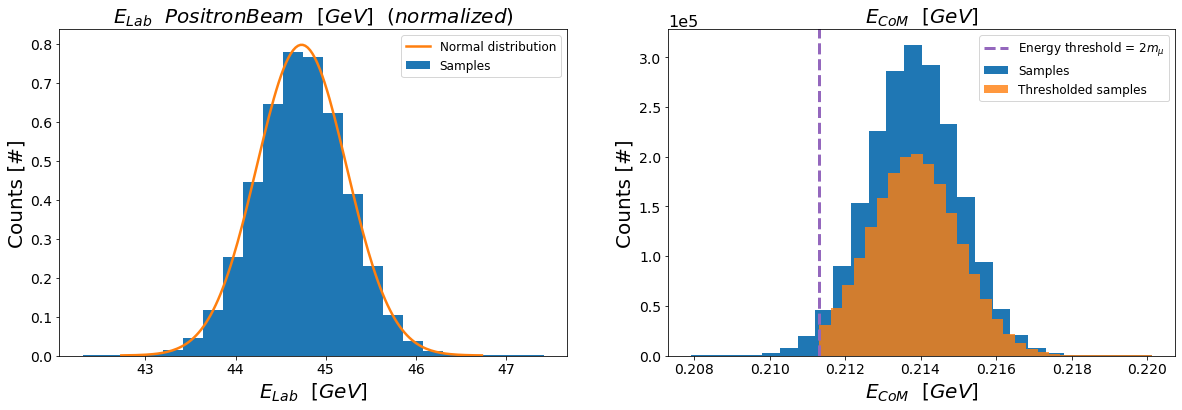

In [36]:
import scipy.stats as stats
np.random.seed(311)
#Boost in the Lab frame, sampling from a Gaussian and re-boost in the CoM frame

N=N_simulated
E_exp=2*muon_mass + 0.005
E_exp=E_exp-0.0025
print("Central energy value for incoming positron beam (CoM): ","{:.3f}".format(E_exp/2), "GeV")
# Calculate relativistic factors
beta_Com = - np.sqrt( 1. - ((2*electron_mass)**2)/(E_exp)**2 )
gamma_Com = 1./np.sqrt(1-beta_Com**2)

# Boost to lab frame
p_z_com=np.sqrt((E_exp/2)**2 - electron_mass**2)
E_lab=gamma_Com*((E_exp/2) - beta_Com*p_z_com)
print("Central energy value for incoming positron beam (Lab): ", "{:.3f}".format(E_lab), "GeV")

# Sample from normal distribution
E_lab_sample=np.random.normal(E_lab, 0.5, N)

beta_lab = (np.sqrt(E_lab_sample**2-electron_mass**2))/(E_lab_sample+electron_mass)
gamma_lab = 1./np.sqrt(1-beta_lab**2)
# Boost back to CoM frame

E_sample=2*gamma_lab*(E_lab_sample - beta_lab*np.sqrt(np.power(E_lab_sample,2) - np.power(electron_mass,2))) # 2 factor takes into account the total CoM energy
Energies = pd.DataFrame({ 'E_lab_sample': E_lab_sample,'E_sample': E_sample,'gamma_lab': gamma_lab,'beta_lab': beta_lab  })
Energies = Energies[Energies.E_sample>2*muon_mass].reset_index()
E_sample_filt = Energies['E_sample'].to_numpy() #only consider energies above production threshold

# Visualize
fig, ax = plt.subplots(1,2, figsize=(20,6))
x = np.linspace(E_lab - 4*0.5, E_lab + 4*0.5, 150) # Sequence for distribution plot
ax[0].hist(E_lab_sample,bins='doane', density=True, label="Samples")
ax[0].plot(x, stats.norm.pdf(x, E_lab, 0.5), lw=2.5, label="Normal distribution")
ax[0].set_ylabel(r"Counts [#]",fontsize=20)
ax[0].set_xlabel(r'$E_{Lab} \,\,\,\, [GeV]$',fontsize=20)
ax[0].set_title(r'$E_{Lab} \,\,\,\,  Positron Beam \,\,\,\, [GeV] \,\,\,\, (normalized) $',fontsize=20)
ax[0].legend(fontsize=12); ax[0].tick_params(labelsize=14)
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0].yaxis.get_offset_text().set_fontsize(16)

ax[1].hist(E_sample, bins='doane', label="Samples")
ax[1].hist(E_sample_filt, bins='doane', label="Thresholded samples", alpha=0.8)
ax[1].axvline(x=2*muon_mass, ymin=0, ymax=14000, color='C4', linewidth=3, linestyle='dashed', label='Energy threshold = $2m_{\mu}$')
ax[1].set_ylabel(r"Counts [#]",fontsize=20)
ax[1].set_xlabel(r'$E_{CoM} \,\,\,\, [GeV]$',fontsize=20)
ax[1].set_title(r'$E_{CoM} \,\,\,\, [GeV] $',fontsize=20)
ax[1].legend(fontsize=12); ax[1].tick_params(labelsize=14)
ax[1].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1].yaxis.get_offset_text().set_fontsize(16)

plt.show()

We now generate as many events as the number of sampled energies above the threshold. The fastest method returning a given number of samples is inverse sampling.

In [37]:
new_N = len(E_sample_filt)
print("Number of events above production threshold:", new_N)

Number of events above production threshold: 1962450


In [38]:
#Generating events via inverse sampling

np.random.seed(311)
x = np.random.uniform(0,1,new_N)
z = [brentq(cdf_zeros,-1,1,args=(x,s)) for x, s in zip(x, E_sample_filt**2)]

theta_samples = np.arccos(z)*180/np.pi
phi_samples = 360*np.random.random(new_N) 

##  Momenta distributions

In [39]:
#momenta in the CoM

%precision 6
p_sample = np.sqrt((E_sample_filt/2)**2 - muon_mass**2)
np.random.seed(311)
momenta_sample=pd.DataFrame(columns=['Anti_muon_px','Anti_muon_py','Anti_muon_pz','Muon_px','Muon_py','Muon_pz'])

momenta_sample['Anti_muon_px'] = p_sample*np.cos(phi_samples*(np.pi/180))*np.sin(np.asarray(theta_samples)*(np.pi/180))
momenta_sample['Anti_muon_py'] = p_sample*np.sin(phi_samples*(np.pi/180))*np.sin(np.asarray(theta_samples)*(np.pi/180))
momenta_sample['Anti_muon_pz'] = p_sample*np.cos(np.asarray(theta_samples)*(np.pi/180))
momenta_sample['Muon_px'] = - momenta_sample['Anti_muon_px']
momenta_sample['Muon_py'] = - momenta_sample['Anti_muon_py']
momenta_sample['Muon_pz'] = - momenta_sample['Anti_muon_pz']
momenta_sample["beta_Com"]=beta_Com
momenta_sample["gamma_Com"]=gamma_Com

#Boost in the Lab frame

momenta_sample_lab=pd.DataFrame(columns=['Anti_muon_px','Anti_muon_py','Anti_muon_pz','Muon_px','Muon_py','Muon_pz'])

beta = - np.sqrt( 1. - ((2*electron_mass)**2)/E_sample_filt**2 )
gamma = 1./np.sqrt(1-beta**2)

momenta_sample_lab['Anti_muon_px'] = momenta_sample['Anti_muon_px']
momenta_sample_lab['Anti_muon_py'] = momenta_sample['Anti_muon_py']
momenta_sample_lab['Anti_muon_pz'] = gamma*momenta_sample['Anti_muon_pz'] - beta*gamma*E_sample_filt/2 
momenta_sample_lab['Muon_px'] = momenta_sample['Muon_px']
momenta_sample_lab['Muon_py'] = momenta_sample['Muon_py']
momenta_sample_lab['Muon_pz'] = gamma*momenta_sample['Muon_pz'] - beta*gamma*E_sample_filt/2
momenta_sample_lab["E_Lab_positron"]= Energies['E_lab_sample']
momenta_sample_lab["E_CoM"]=E_sample_filt/2
momenta_sample_lab["gamma_lab"]=Energies['gamma_lab']
momenta_sample_lab["beta_lab"]=Energies['beta_lab']

momenta_sample.to_csv("data/Momenta_CoM_2.csv", index=False, index_label=False)
momenta_sample_lab.to_csv("data/Momenta_Lab_2.csv", index=False, index_label=False)

In [40]:
momenta_sample = pd.read_csv("data/Momenta_CoM_2.csv")
momenta_sample_lab = pd.read_csv("data/Momenta_Lab_2.csv")

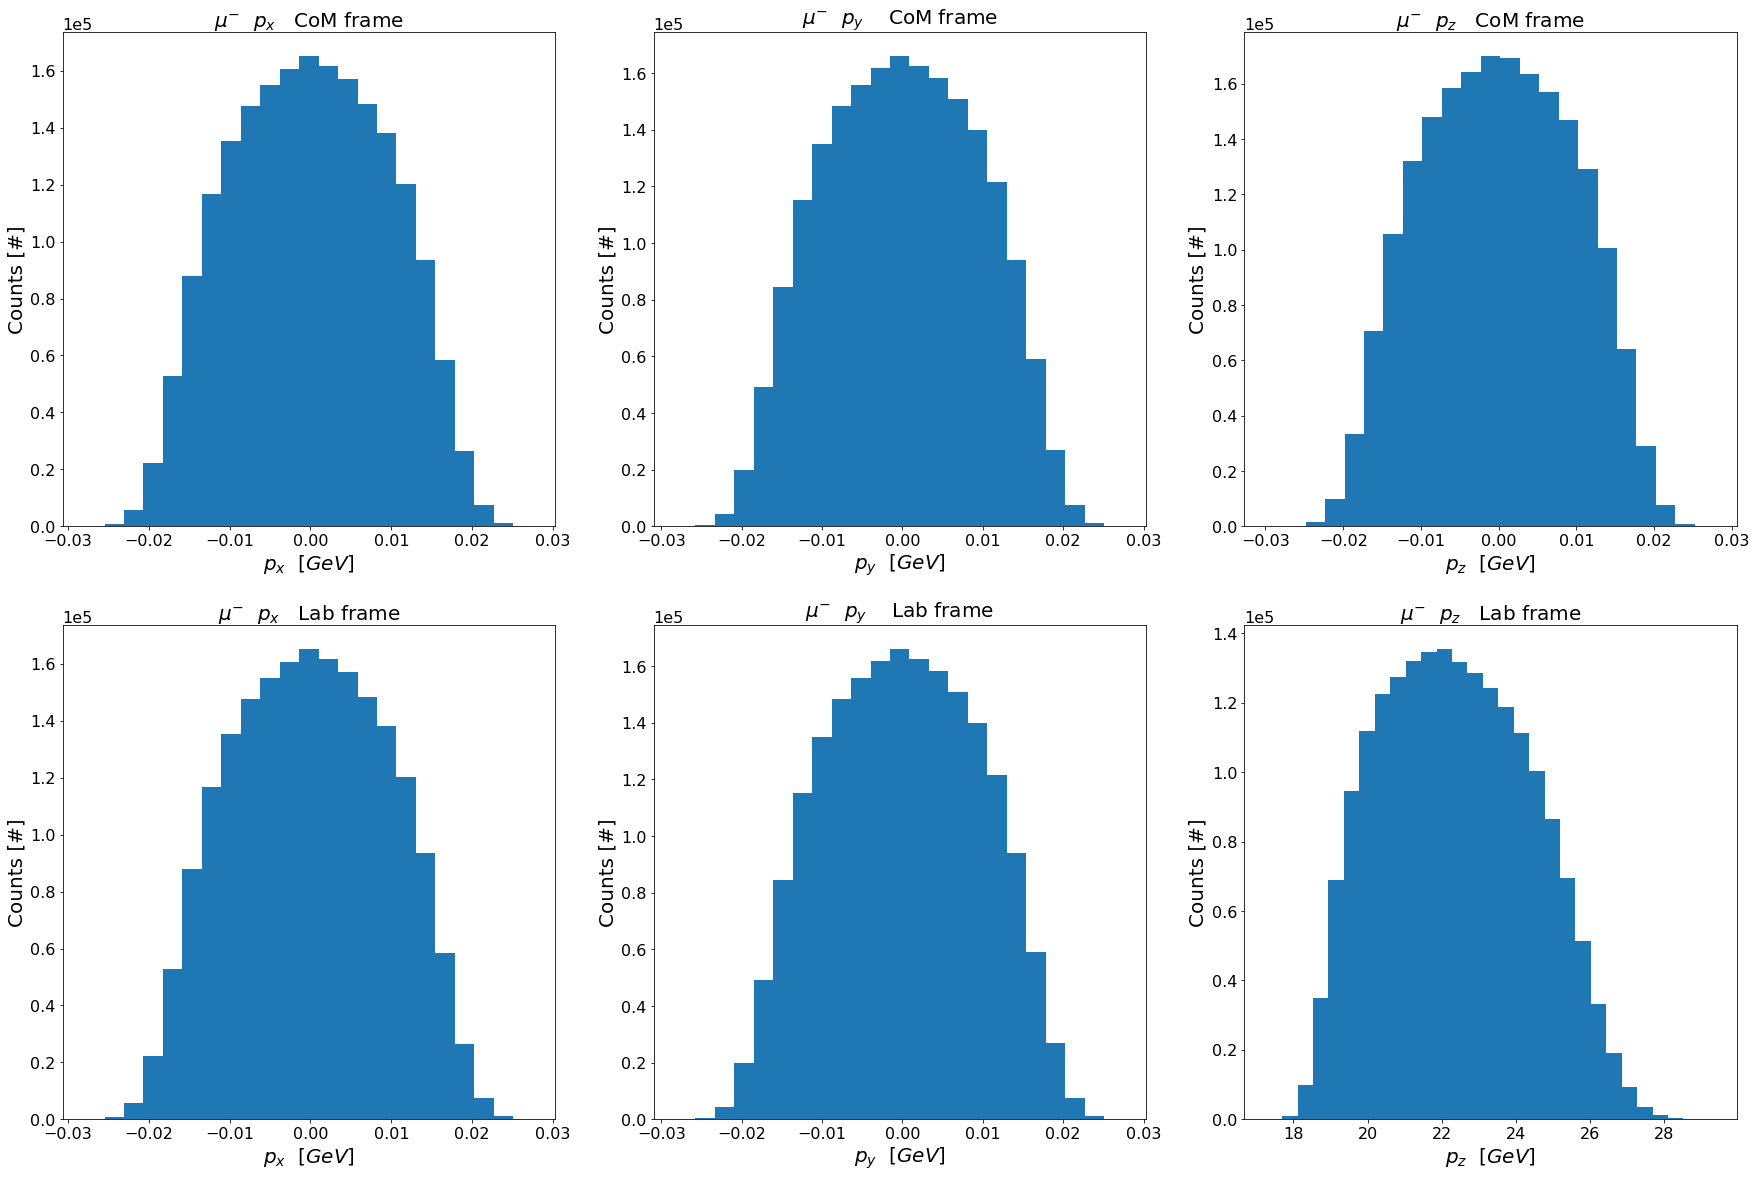

In [41]:
fig, ax = plt.subplots(2,3, figsize=(30,20))
ax[0,0].hist(momenta_sample['Muon_px'],bins='doane')
ax[0,0].set_title(r'$\mu^{-}  \,\,\,\, p_{x} $   CoM frame',fontsize=20)
ax[0,0].set_ylabel(r"Counts [#]",fontsize=20)
ax[0,0].set_xlabel(r'$p_{x} \,\,\,\, [GeV]$',fontsize=20)
ax[0,0].tick_params(labelsize=16)
ax[0,0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0,0].yaxis.get_offset_text().set_fontsize(16)

ax[0,1].hist(momenta_sample['Muon_py'],bins='doane')
ax[0,1].set_title(r'$\mu^{-}  \,\,\,\, p_{y}$    CoM frame',fontsize=20)
ax[0,1].set_ylabel(r"Counts [#]",fontsize=20)
ax[0,1].set_xlabel(r'$p_{y} \,\,\,\, [GeV]$',fontsize=20)
ax[0,1].tick_params(labelsize=16)
ax[0,1].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0,1].yaxis.get_offset_text().set_fontsize(16)

ax[0,2].hist(momenta_sample['Muon_pz'],bins='doane')
ax[0,2].set_ylabel(r"Counts [#]",fontsize=20)
ax[0,2].set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax[0,2].set_title(r'$\mu^{-}  \,\,\,\, p_{z} $   CoM frame',fontsize=20)
ax[0,2].tick_params(labelsize=16)
ax[0,2].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0,2].yaxis.get_offset_text().set_fontsize(16)

ax[1,0].hist(momenta_sample_lab['Muon_px'],bins='doane')
ax[1,0].set_title(r'$\mu^{-}  \,\,\,\, p_{x} $   Lab frame',fontsize=20)
ax[1,0].set_ylabel(r"Counts [#]",fontsize=20)
ax[1,0].set_xlabel(r'$p_{x} \,\,\,\, [GeV]$',fontsize=20)
ax[1,0].tick_params(labelsize=16)
ax[1,0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1,0].yaxis.get_offset_text().set_fontsize(16)

ax[1,1].hist(momenta_sample_lab['Muon_py'],bins='doane')
ax[1,1].set_title(r'$\mu^{-}  \,\,\,\, p_{y}$    Lab frame',fontsize=20)
ax[1,1].set_ylabel(r"Counts [#]",fontsize=20)
ax[1,1].set_xlabel(r'$p_{y} \,\,\,\, [GeV]$',fontsize=20)
ax[1,1].tick_params(labelsize=16)
ax[1,1].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1,1].yaxis.get_offset_text().set_fontsize(16)

ax[1,2].hist(momenta_sample_lab['Muon_pz'],bins='doane')
ax[1,2].set_ylabel(r"Counts [#]",fontsize=20)
ax[1,2].set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax[1,2].set_title(r'$\mu^{-}  \,\,\,\, p_{z} $   Lab frame',fontsize=20)
ax[1,2].tick_params(labelsize=16)
ax[1,2].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1,2].yaxis.get_offset_text().set_fontsize(16)

Here we procede in showing the beam transverse shape distribution by sampling from a uniform distribution the radius and the angle.

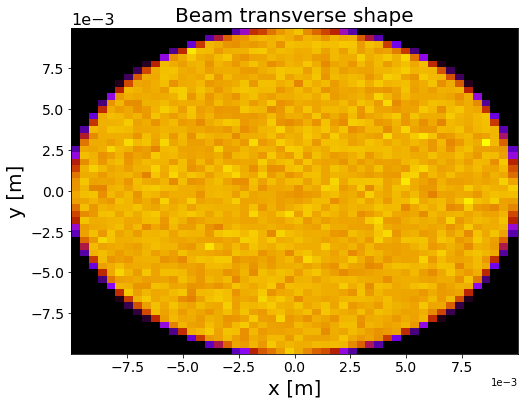

In [42]:
def circle(x,y,r):
    return x**2+y**2-r**2

#we multiply by np.pi in order to take into account the samples that are left out

x = np.random.uniform(-0.01,0.01,round(N*np.pi))
y = np.random.uniform(-0.01,0.01,round(N*np.pi))

mask = np.argwhere(circle(x,y,0.01)<=0)
x=x[mask].T[0]; y=y[mask].T[0]
x=x[:new_N]; y=y[:new_N]

# Plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.hist2d(x,y,bins=50,cmap=plt.get_cmap('gnuplot'))
ax.set_title("Beam transverse shape",fontsize=20)
ax.set_xlabel("x [m]",fontsize=20)
ax.set_ylabel("y [m]",fontsize=20)
ax.tick_params(labelsize=14)
ax.ticklabel_format(style='sci',scilimits=(-3,3))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.yaxis.get_offset_text().set_fontsize(16)
plt.show()

# Dipole

***
* Assume a $2$ meter long, $1.7$ Tesla dipole magnet is placed right after the target. Display the occupancy of the muon hits on a tracking detector placed at 6 meters after the dipole.
***

<img src="img/deflectionMagneticField.png" width="600">

\begin{equation}
\alpha_{deflection} = sin^{-1} \Big( \frac{q B L}{p_{yz}} \Big)
\end{equation}

with:

p=component of the momentum perpendicular to B

q = charge of the particle ($q_{\mu} = -e$)

ALL THE VALUES OF MOMENTUM ARE IN THE LAB FRAME

----------

Let's assume the dipole is placed so that the magnetic field is PARALLEL TO THE X AXIS. In this case the important component of the momentum is the one laying on the yz axis

----------

MOTION ALONG YZ PLANE:

the final momentum along the y and z components will be respectively:

\begin{equation}
p_z = p_{yz} \cdot sin (\alpha_{deflection} + \theta_{yz} )
\\p_y = p_{yz} \cdot cos (\alpha_{deflection} + \theta_{yz} )
\end{equation}

where angle $\theta_{yz}$ is the one formed by the momentum on the yz axis with respect to the y axis.

which means that after:
\begin{equation}
t = \frac{m_{\mu} \cdot distance}{p_z}
\end{equation}

the particle will hit the detector.

Also, the toal time spent in the magnetic field is:

\begin{equation}
t_m = \frac{\alpha_{deflection} m_{\mu}}{q B}
\end{equation}

----

MOTION ALONG Y AXIS:

The particle leaves the magnetic field at a distance from the z axis (i.e. value of y coordinate) equal to:

\begin{equation}
\hat{y} = y_0 \pm R(1-cos\alpha_{deflection}) 
 \\ R = \frac{p_{yz}}{q B}
 \\y_0 = \frac{p_y}{p_z} \cdot L 
\end{equation}

The sign detepends on wheter the particle has positive or negative charge, and $y_0$ is the distance the particle would travel if the magnetic field were absent.

This means that the particle will hit the detector with total y component:
\begin{equation}
y = \hat{y} + \frac{p_y}{m} \cdot t
\end{equation}

----

MOTION ALONG X AXIS

The motion along the component parallel to B is uneffected so the final x component will be:

\begin{equation}
x = \frac{p_x}{m} \cdot (t_m + t)
\end{equation}

It is important to notice that this "classical" approach also holds in the relativistic case if we multiply the mass of the muon by the Lorentz factor (which is constant, given that there is no electric field involved in the Lab frame and thus $|{v}|$ is constant).

In [43]:
B = 1.7 #Tesla (Magnetic Field goes from N to S)
L = 2 #m, space the particle travel while subjected to the Magnetic field
distance = 6 #m distance traveled by the particle after being deflected

#Muons and antimuos belonging to the same scattering will have opposite
#behaviour (since the only difference between them is the charge)

In [44]:
p_mu = np.sqrt(momenta_sample_lab['Muon_px']**2 +momenta_sample_lab['Muon_py']**2 + momenta_sample_lab['Muon_pz']**2)
p_anti_mu = np.sqrt(momenta_sample_lab['Anti_muon_px']**2 +momenta_sample_lab['Anti_muon_py']**2 + momenta_sample_lab['Anti_muon_pz']**2)

#Beta e gamma
beta_mu = p_mu/np.sqrt(p_mu**2 + muon_mass**2) 
beta_anti_mu = p_anti_mu/np.sqrt(p_anti_mu**2 + muon_mass**2) 

gamma_mu = 1. / np.sqrt( 1. - beta_mu**2 )
gamma_anti_mu = 1. / np.sqrt( 1. - beta_anti_mu**2 )

new_muon_mass = muon_mass*gamma_mu
new_anti_muon_mass = muon_mass*gamma_anti_mu

positions_dipole = pd.DataFrame(columns=["x_mu", "y_mu", "x_anti_mu", "y_anti_mu"])

## $\mu^-$

In [45]:
#computing values (before the magnetic field)
p_x = momenta_sample_lab['Muon_px']
p_yz = np.sqrt(momenta_sample_lab['Muon_pz']**2 + momenta_sample_lab['Muon_py']**2)
theta_yz = np.arctan(momenta_sample_lab['Muon_pz']/momenta_sample_lab['Muon_py'])
#handling the case in which p_y is < 0: since p_z is never <0 the only case posssible for theta to be negative is when
#p_y is. In this case the atan gets the angle wrong.
theta_yz[theta_yz < 0] = np.pi + theta_yz[theta_yz < 0]

#after the deflection:
alpha_def = np.arcsin(-electron_charge*B*L/(p_yz*conversion1))
p_z = p_yz * np.sin(theta_yz - alpha_def)
p_y = p_yz * np.cos(theta_yz - alpha_def)
t = (new_muon_mass*conversion2 * distance)/(p_z*conversion1)
t_m = abs(alpha_def) * new_muon_mass*conversion2 / (electron_charge * B)

#motion along y axis
R = p_yz*conversion1 / (electron_charge * B)
y0 = momenta_sample_lab['Muon_py'] * L / momenta_sample_lab['Muon_pz'] #conversion factors cancel out
y_hat = y0 - R*(1-np.cos(alpha_def))
#y is the previously computed uniform displacement in a circle
positions_dipole["y_mu"] = y_hat + p_y*conversion1*t/(new_muon_mass*conversion2) + y 

#motion along x axis
#x is the previously computed uniform displacement in a circle
positions_dipole["x_mu"] = p_x*conversion1* (t_m + t)/(new_muon_mass*conversion2) + x


## $\mu_+$

In [46]:
#computing values (before the magnetic field)
p_x = momenta_sample_lab['Anti_muon_px']
p_yz = np.sqrt(momenta_sample_lab['Anti_muon_pz']**2 + momenta_sample_lab['Anti_muon_py']**2)
theta_yz = np.arctan(momenta_sample_lab['Anti_muon_pz']/momenta_sample_lab['Anti_muon_py'])
#handling the case in which p_y is < 0: since p_z is never <0 the only case posssible for theta to be negative is when
#p_y is. In this case the atan gets the angle wrong.
theta_yz[theta_yz < 0] = np.pi + theta_yz[theta_yz < 0]

#after the deflection:
alpha_def = np.arcsin(electron_charge*B*L/(p_yz*conversion1))
p_z = p_yz * np.sin(theta_yz - alpha_def)
p_y = p_yz * np.cos(theta_yz - alpha_def)
t = (new_anti_muon_mass*conversion2 * distance)/(p_z*conversion1)
t_m = abs(alpha_def) * new_anti_muon_mass*conversion2 / (electron_charge * B)

#motion along y axis
R = p_yz*conversion1 / (electron_charge * B)
y0 = momenta_sample_lab['Anti_muon_py'] * L / momenta_sample_lab['Anti_muon_pz'] #conversion factors cancel out
y_hat = y0 + R*(1-np.cos(alpha_def))
positions_dipole["y_anti_mu"] = y_hat + p_y*conversion1*t/(new_anti_muon_mass*conversion2) +y

#motion along x axis
positions_dipole["x_anti_mu"] = p_x*conversion1* (t_m + t)/(new_anti_muon_mass*conversion2) +x

positions_dipole.to_csv("data/positions_dipole.csv", index=False, index_label=False)

## Results

In [47]:
positions = pd.DataFrame(columns=["x_mu", "y_mu", "x_anti_mu", "y_anti_mu"])

t = (new_muon_mass*conversion2 * distance)/(momenta_sample_lab['Muon_pz']*conversion1)
positions["x_mu"] = momenta_sample_lab['Muon_px']*conversion1*t/(new_muon_mass*conversion2) + x
positions["y_mu"] = momenta_sample_lab['Muon_py']*conversion1*t/(new_muon_mass*conversion2) + y

t = (new_anti_muon_mass*conversion2 * distance)/(momenta_sample_lab['Anti_muon_pz']*conversion1)
positions["x_anti_mu"] = momenta_sample_lab['Anti_muon_px']*conversion1*t/(new_anti_muon_mass*conversion2) + x
positions["x_anti_mu"] = momenta_sample_lab['Anti_muon_py']*conversion1*t/(new_anti_muon_mass*conversion2) + y

positions.to_csv("data/positions.csv", index=False, index_label=False)

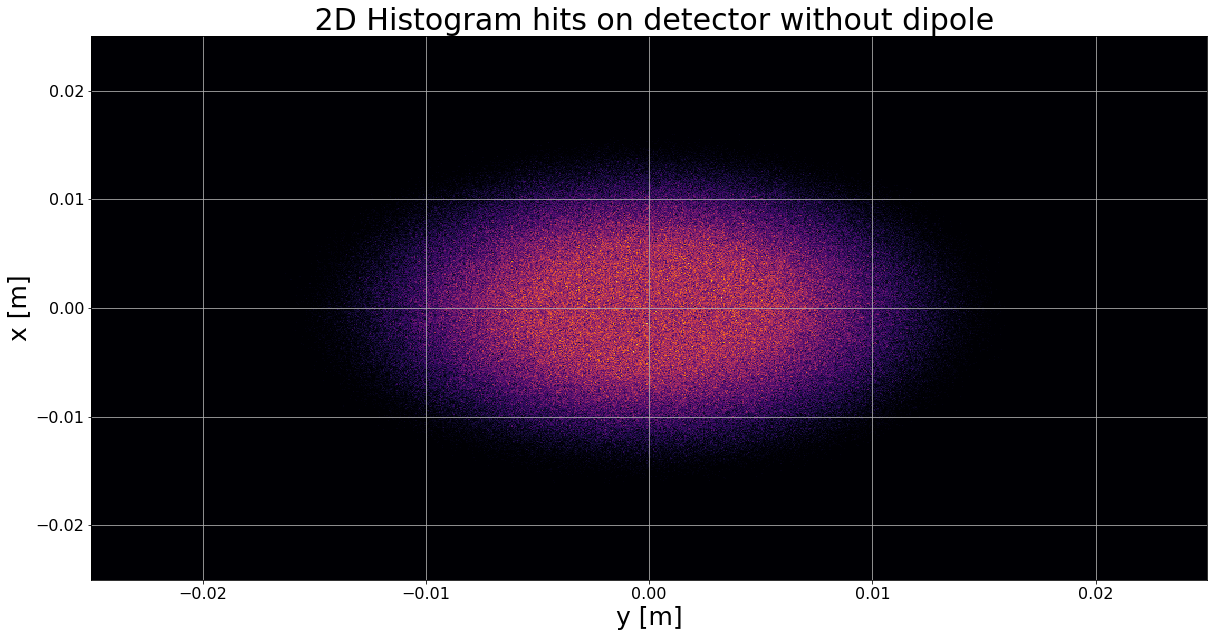

In [48]:
positions = pd.read_csv("data/positions.csv")

xfin = np.append(np.array(positions["x_mu"]), np.array(positions["x_anti_mu"]))
yfin = np.append(np.array(positions["y_mu"]), np.array(positions["y_anti_mu"]))

fig, ax = plt.subplots(figsize=(20,10))
ax.hist2d(yfin,xfin,bins=1000,cmap="inferno",range=[[-0.025,0.025],[-0.025,0.025]])
ax.set_xlabel("y [m]",fontsize=25)
ax.set_ylabel("x [m]",fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title(" 2D Histogram hits on detector without dipole", fontsize=30)
ax.grid()
plt.show()

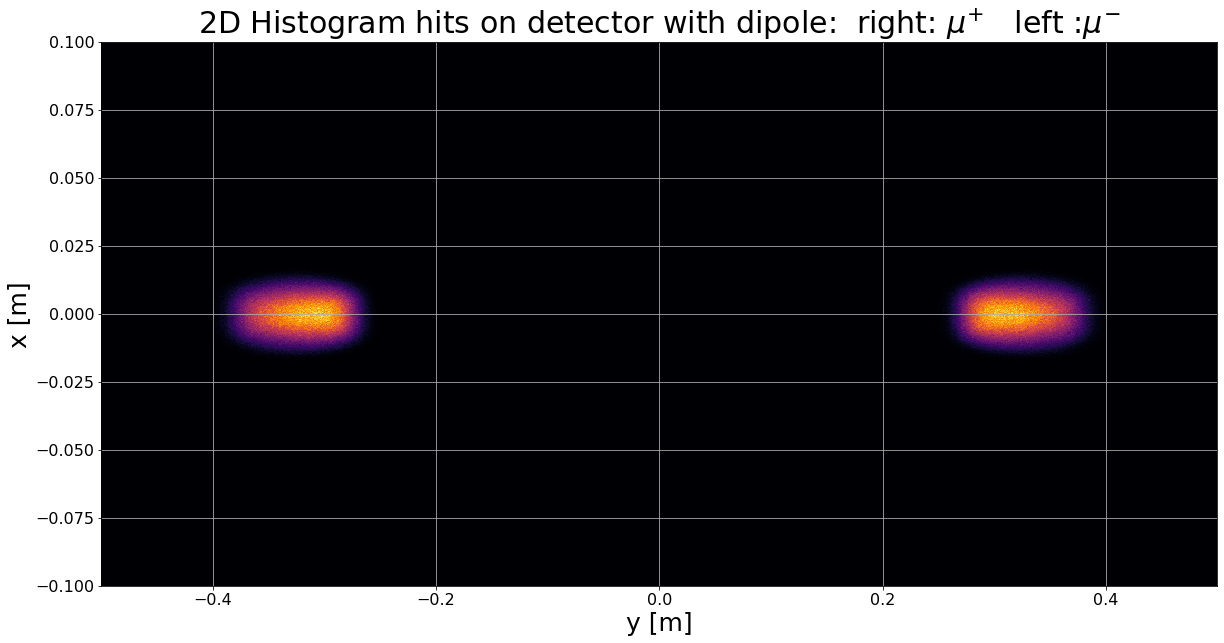

In [49]:
positions_dipole = pd.read_csv("data/positions_dipole.csv")
xfin = np.append(np.array(positions_dipole["x_mu"]), np.array(positions_dipole["x_anti_mu"]))
yfin = np.append(np.array(positions_dipole["y_mu"]), np.array(positions_dipole["y_anti_mu"]))

fig, ax = plt.subplots(figsize=(20,10))
ax.hist2d(yfin,xfin,bins=1000,cmap="inferno",range=[[-0.5,0.5],[-0.1,0.1]])
ax.set_xlabel("y [m]",fontsize=25)
ax.set_ylabel("x [m]",fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title(r'2D Histogram hits on detector with dipole:  right: $\mu^{+}$   left :$\mu^{-}$', fontsize=30)
ax.grid()
plt.show()

***
# Further analysis: Beam Angular Smearing

\begin{align*} 
& p_x=|p|\cos\theta\sin\phi\\
& p_y=|p|\sin\theta\\
& p_z=|p|\cos\theta\cos\phi\\
\end{align*}
<br>
<br>
<br>
$$p_1=(E_1,p_x,p_y,p_z) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,p_2=(m_e,0,0,0)$$

<img src="img/smearing.png" width="500">

## Introduction:

The following transformation that can be found on [Wikipedia](https://it.wikipedia.org/wiki/Trasformazione_di_Lorentz) is "only" a boost or a transformation between two reference systems in which the x, y, z axis are parallel and in which the origins of space time coincide.
$$\begin{bmatrix}
c\,t' \\ x' \\ y' \\ z'
\end{bmatrix}
=
\begin{bmatrix}
\gamma&-\gamma\,\beta_x&-\gamma\,\beta_y&-\gamma\,\beta_z\\
-\gamma\,\beta_x&1+(\gamma-1)\dfrac{\beta_x^2}{\beta^2}&(\gamma-1)\dfrac{\beta_x \beta_y}{\beta^2}&(\gamma-1)\dfrac{\beta_x \beta_z}{\beta^2}\\
-\gamma\,\beta_y&(\gamma-1)\dfrac{\beta_y \beta_x}{\beta^2}&1+(\gamma-1)\dfrac{\beta_y^2}{\beta^2}&(\gamma-1)\dfrac{\beta_y \beta_z}{\beta^2}\\
-\gamma\,\beta_z&(\gamma-1)\dfrac{\beta_z \beta_x}{\beta^2}&(\gamma-1)\dfrac{\beta_z \beta_y}{\beta^2}&1+(\gamma-1)\dfrac{\beta_z^2}{\beta^2}\\
\end{bmatrix}
\begin{bmatrix}
c\,t \\ x \\ y \\ z
\end{bmatrix}$$
<br>
Performing a boost in an arbitrary direction is not the easier way because we go to the following situation:
<br>
<br>
$p_1=(E_1,p_x,p_y,p_z) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,p_2=(m_e,0,0,0) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \longrightarrow$        $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p_1=(E,p'_x,p'_y,p'_z) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,p_2=(E,-p'_x,-p'_y,-p'_z) $
<br>
<br>
In this situation the cross section must be reviewed, for example as starting point the angle $\cos(\theta)$ is surely no more the angle between the $z$ and $x$ axes.

## Suggested solution:

We can perform a space rotation (not involving the zero component of the four-momentum) so that the z-axis is the trajectory of the colliding particle. In this way we return in the situation in which a boost along z-axis is needed. After having calculated the (anti-)muons momenta distributions in the laboratory frame we apply inverse rotation on the momenta distributions to obtain the final result.

$$p_1=(E_1,p_x,p_y,p_z) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,p_2=(m_e,0,0,0)$$
<br>
<br>
$$\begin{bmatrix}
E_1 \\ 0 \\ 0 \\ p_z'= \sqrt{p_x^2 + p_y^2 + p_z^2}
\end{bmatrix}
=
\begin{bmatrix}
1& 0 & 0 & 0 \\
0& R_{11}&R_{12} &R_{13}\\
0& R_{21} &R_{22} & R_{23}\\
0& R_{31} &R_{32} & R_{33}\\
\end{bmatrix}
\begin{bmatrix}
E_1 \\ p_x \\ p_y \\ p_z
\end{bmatrix}$$

$$p_1=(E_1,0,0,p'_z) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,p_2=(m_e,0,0,0)$$
<br>
To align the system of reference as described before we need to rotate the system clock-wise of $\theta$ around the x-axis and of $\phi$ around the $y$ axis. 

$$R_{x,y}(\theta,\phi) = R_x(\theta)R_y(\phi) =\begin{bmatrix}
1 & 0  &  0  \\
0 & \cos (\theta)  &  -\sin (\theta) \\[3pt]
0 & \sin (\theta)  &  \cos (\theta) \\[3pt]
\end{bmatrix}
\begin{bmatrix}
\cos(\phi) & 0  &  -\sin(\phi)  \\
0 & 1 & 0\\[3pt]
\sin (\phi) &0 &  \cos(\phi) \\[3pt]
\end{bmatrix} = \begin{bmatrix}
\cos(\phi) & 0  &  -\sin(\phi)  \\
-\sin (\theta)\sin(\phi) & \cos (\theta)  &  -\sin (\theta)\cos(\phi) \\[3pt]
\sin (\phi)\cos (\theta) & \sin (\theta)  &  \cos (\theta)\cos(\phi) \\[3pt]
\end{bmatrix}$$
<br>
<br>
$$L(\theta,\phi) = \begin{bmatrix}
1 & 0 & 0 & 0 \\[3pt]
0 & \cos(\phi) & 0  &  -\sin(\phi)  \\[3pt]
0 & -\sin (\theta)\sin(\phi) & \cos (\theta)  &  -\sin (\theta)\cos(\phi) \\[3pt]
0 & \sin (\phi)\cos (\theta) & \sin (\theta)  &  \cos (\theta)\cos(\phi) \\[3pt]
\end{bmatrix}$$
<br>
We remember that because of $R_{x,y} \in SO(3)$ we have $R_{x,y}^{-1}=R_{x,y}^{T}$

In [50]:
def from_rad_to_deg(theta):
    return theta*(180/np.pi)
def from_deg_to_rad(theta):
    return theta*(180/np.pi)**(-1)

In [51]:
E_Lab=momenta_sample_lab["E_Lab_positron"].to_numpy()
electron_mass = 0.0005109989461 # GeV
modulus_p = np.sqrt(E_Lab**2-electron_mass**2)

We fixed the angolar smearing with two gaussian distributions centered in 500 $\mu rad$ with $\sigma = 250$ $\mu rad$.

In [52]:
smearing_ang= 500 # microrad
angle_deg = smearing_ang*(180/np.pi)*10**(-6)
print("Δϕ = Δθ = ", angle_deg, "°")
sigma = 0.5*angle_deg
np.random.seed(310)
theta1 = - np.random.normal(loc=angle_deg, scale=sigma, size=new_N)
theta1_rad = from_deg_to_rad(theta1)
phi1 = - np.random.normal(loc=angle_deg, scale=sigma, size=new_N)
phi1_rad = from_deg_to_rad(phi1)
py= modulus_p*np.sin(theta1_rad)
px= modulus_p*np.cos(theta1_rad)*np.sin(phi1_rad)
pz= modulus_p*np.cos(theta1_rad)*np.cos(phi1_rad)

Δϕ = Δθ =  0.02864788975654116 °


In [53]:
Muon_px=momenta_sample_lab["Muon_px"].to_numpy()
Muon_py=momenta_sample_lab["Muon_py"].to_numpy()
Muon_pz=momenta_sample_lab["Muon_pz"].to_numpy()
Anti_muon_px=momenta_sample_lab['Anti_muon_px']
Anti_muon_py=momenta_sample_lab['Anti_muon_py'] 
Anti_muon_pz=momenta_sample_lab['Anti_muon_pz'] 

In [54]:
import time
start_time = time.time()
list_of_matrices = []
for i in range(new_N):
    R3xy = np.array([[np.cos(phi1_rad[i]),0,-np.sin(phi1_rad[i])],
                     [-np.sin(theta1_rad[i])*np.sin(phi1_rad[i]),np.cos(theta1_rad[i]),-np.sin(theta1_rad[i])*np.cos(phi1_rad[i])],
                     [np.sin(phi1_rad[i])*np.cos(theta1_rad[i]),np.sin(theta1_rad[i]),np.cos(phi1_rad[i])*np.cos(theta1_rad[i])]
                     ])
    R3xy_inv = R3xy.transpose((1, 0))
    list_of_matrices.append(R3xy_inv)
print("Cell execution time = %1.2f seconds " % (time.time() - start_time))

Cell execution time = 36.74 seconds 


In [55]:
start_time = time.time()
rotated_momenta = pd.DataFrame(columns=["Muon_px_rotated", "Muon_py_rotated", "Muon_pz_rotated",
                                        "AntiMuon_px_rotated", "AntiMuon_py_rotated", "AntiMuon_pz_rotated"])
array_of_rotated_momenta_muon = []
array_of_rotated_momenta_antimuon = []
for i in range(new_N):
    p_3d = np.array([Muon_px[i],Muon_py[i],Muon_pz[i]])
    p1_3d = np.array([Anti_muon_px[i],Anti_muon_py[i],Anti_muon_pz[i]])
    temp = np.matmul(list_of_matrices[i],p_3d)
    temp1 = np.matmul(list_of_matrices[i],p1_3d)
    array_of_rotated_momenta_muon.append(temp)
    array_of_rotated_momenta_antimuon.append(temp1)
print("Cell execution time = %1.2f seconds " % (time.time() - start_time))

Cell execution time = 115.16 seconds 


In [56]:
array_of_Muon_px_rotated =[]
array_of_Muon_py_rotated =[]
array_of_Muon_pz_rotated =[]
array_of_AntiMuon_px_rotated =[]
array_of_AntiMuon_py_rotated =[]
array_of_AntiMuon_pz_rotated =[]
for i in range(new_N):
    array_of_Muon_px_rotated.append(array_of_rotated_momenta_muon[i][0])
    array_of_Muon_py_rotated.append(array_of_rotated_momenta_muon[i][1])
    array_of_Muon_pz_rotated.append(array_of_rotated_momenta_muon[i][2])
    array_of_AntiMuon_px_rotated.append(array_of_rotated_momenta_antimuon[i][0])
    array_of_AntiMuon_py_rotated.append(array_of_rotated_momenta_antimuon[i][1])
    array_of_AntiMuon_pz_rotated.append(array_of_rotated_momenta_antimuon[i][2])
rotated_momenta = pd.DataFrame({'Muon_px_rotated': array_of_Muon_px_rotated,'Muon_py_rotated': array_of_Muon_py_rotated,
                                'Muon_pz_rotated': array_of_Muon_pz_rotated,"AntiMuon_px_rotated":array_of_AntiMuon_px_rotated, 
                                "AntiMuon_py_rotated":array_of_AntiMuon_py_rotated, "AntiMuon_pz_rotated":array_of_AntiMuon_pz_rotated  })

## Momenta distributions

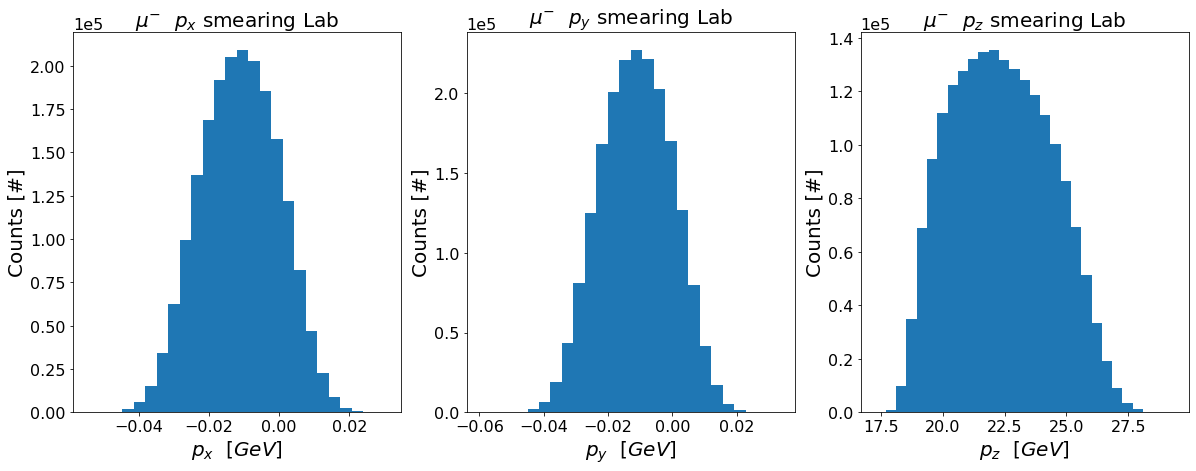

In [57]:
fig, ax = plt.subplots(1,3, figsize=(20,7))
ax[0].hist(rotated_momenta['Muon_px_rotated'],bins='doane')
ax[0].set_title(r'$\mu^{-}  \,\,\,\, p_{x} $ smearing Lab',fontsize=20)
ax[0].set_ylabel(r"Counts [#]",fontsize=20)
ax[0].set_xlabel(r'$p_{x} \,\,\,\, [GeV]$',fontsize=20)
ax[0].tick_params(labelsize=16)
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0].yaxis.get_offset_text().set_fontsize(16)

ax[1].hist(rotated_momenta['Muon_py_rotated'],bins='doane')
ax[1].set_title(r'$\mu^{-}  \,\,\,\, p_{y} $ smearing Lab',fontsize=20)
ax[1].set_ylabel(r"Counts [#]",fontsize=20)
ax[1].set_xlabel(r'$p_{y} \,\,\,\, [GeV]$',fontsize=20)
ax[1].tick_params(labelsize=16)
ax[1].ticklabel_format(style='sci',scilimits=(-3,3))
ax[1].yaxis.get_offset_text().set_fontsize(16)

ax[2].hist(rotated_momenta['Muon_pz_rotated'],bins='doane')
ax[2].set_ylabel(r"Counts [#]",fontsize=20)
ax[2].set_xlabel(r'$p_{z} \,\,\,\, [GeV]$',fontsize=20)
ax[2].set_title(r'$\mu^{-}  \,\,\,\, p_{z} $ smearing Lab',fontsize=20)
ax[2].tick_params(labelsize=16)
ax[2].ticklabel_format(style='sci',scilimits=(-3,3))
ax[2].yaxis.get_offset_text().set_fontsize(16)

# Dipole with smearing 

In [58]:
p_mu = np.sqrt(rotated_momenta['Muon_px_rotated']**2 +rotated_momenta['Muon_py_rotated']**2 + rotated_momenta['Muon_pz_rotated']**2)
p_anti_mu = np.sqrt(rotated_momenta['AntiMuon_px_rotated']**2 +rotated_momenta['AntiMuon_py_rotated']**2 + rotated_momenta['AntiMuon_pz_rotated']**2)

#Beta e gamma
beta_mu = p_mu/np.sqrt(p_mu**2 + muon_mass**2) 
beta_anti_mu = p_anti_mu/np.sqrt(p_anti_mu**2 + muon_mass**2) 

gamma_mu = 1. / np.sqrt( 1. - beta_mu**2 )
gamma_anti_mu = 1. / np.sqrt( 1. - beta_anti_mu**2 )

new_muon_mass = muon_mass*gamma_mu
new_anti_muon_mass = muon_mass*gamma_anti_mu

positions_dipole = pd.DataFrame(columns=["x_mu_rotated", "y_mu_rotated", "x_anti_mu_rotated", "y_anti_mu_rotated"])

## $\mu^-$

In [59]:
#computing values (before the magnetic field)
p_x = rotated_momenta['Muon_px_rotated']
p_yz = np.sqrt(rotated_momenta['Muon_pz_rotated']**2 + rotated_momenta['Muon_py_rotated']**2)
theta_yz = np.arctan(rotated_momenta['Muon_pz_rotated']/rotated_momenta['Muon_py_rotated'])
#handling the case in which p_y is < 0: since p_z is never <0 the only case posssible for theta to be negative is when
#p_y is. In this case the atan gets the angle wrong.
theta_yz[theta_yz < 0] = np.pi + theta_yz[theta_yz < 0]

#after the deflection:
alpha_def = np.arcsin(-electron_charge*B*L/(p_yz*conversion1))
p_z = p_yz * np.sin(theta_yz - alpha_def)
p_y = p_yz * np.cos(theta_yz - alpha_def)
t = (new_muon_mass*conversion2 * distance)/(p_z*conversion1)
t_m = abs(alpha_def) * new_muon_mass*conversion2 / (electron_charge * B)

#motion along y axis
R = p_yz*conversion1 / (electron_charge * B)
y0 = rotated_momenta['Muon_py_rotated'] * L / rotated_momenta['Muon_pz_rotated'] #conversion factors cancel out
y_hat = y0 - R*(1-np.cos(alpha_def))
#y is the previously computed uniform displacement in a circle
positions_dipole["y_mu_rotated"] = y_hat + p_y*conversion1*t/(new_muon_mass*conversion2) + y 

#motion along x axis
#x is the previously computed uniform displacement in a circle
positions_dipole["x_mu_rotated"] = p_x*conversion1* (t_m + t)/(new_muon_mass*conversion2) + x

## $\mu_+$

In [60]:
#computing values (before the magnetic field)
p_x = rotated_momenta['AntiMuon_px_rotated']
p_yz = np.sqrt(rotated_momenta['AntiMuon_pz_rotated']**2 + rotated_momenta['AntiMuon_py_rotated']**2)
theta_yz = np.arctan(rotated_momenta['AntiMuon_pz_rotated']/rotated_momenta['AntiMuon_py_rotated'])
#handling the case in which p_y is < 0: since p_z is never <0 the only case posssible for theta to be negative is when
#p_y is. In this case the atan gets the angle wrong.
theta_yz[theta_yz < 0] = np.pi + theta_yz[theta_yz < 0]

#after the deflection:
alpha_def = np.arcsin(electron_charge*B*L/(p_yz*conversion1))
p_z = p_yz * np.sin(theta_yz - alpha_def)
p_y = p_yz * np.cos(theta_yz - alpha_def)
t = (new_anti_muon_mass*conversion2 * distance)/(p_z*conversion1)
t_m = abs(alpha_def) * new_anti_muon_mass*conversion2 / (electron_charge * B)

#motion along y axis
R = p_yz*conversion1 / (electron_charge * B)
y0 = rotated_momenta['AntiMuon_py_rotated'] * L / rotated_momenta['AntiMuon_pz_rotated'] #conversion factors cancel out
y_hat = y0 + R*(1-np.cos(alpha_def))
positions_dipole["y_anti_mu_rotated"] = y_hat + p_y*conversion1*t/(new_anti_muon_mass*conversion2) +y

#motion along x axis
positions_dipole["x_anti_mu_rotated"] = p_x*conversion1* (t_m + t)/(new_anti_muon_mass*conversion2) +x

positions_dipole.to_csv("data/positions_dipole_rotated.csv", index=False, index_label=False)

In [61]:
positions = pd.DataFrame(columns=["x_mu_rotated", "y_mu_rotated", "x_anti_mu_rotated", "y_anti_mu_rotated"])

t = (new_muon_mass*conversion2 * distance)/(rotated_momenta['Muon_pz_rotated']*conversion1)
positions["x_mu_rotated"] = rotated_momenta['Muon_px_rotated']*conversion1*t/(new_muon_mass*conversion2) + x
positions["y_mu_rotated"] = rotated_momenta['Muon_py_rotated']*conversion1*t/(new_muon_mass*conversion2) + y

t = (new_anti_muon_mass*conversion2 * distance)/(rotated_momenta['AntiMuon_pz_rotated']*conversion1)
positions["x_anti_mu_rotated"] = rotated_momenta['AntiMuon_px_rotated']*conversion1*t/(new_anti_muon_mass*conversion2) + x
positions["y_anti_mu_rotated"] = rotated_momenta['AntiMuon_py_rotated']*conversion1*t/(new_anti_muon_mass*conversion2) + y

positions.to_csv("data/positions_rotated.csv", index=False, index_label=False)

## Results

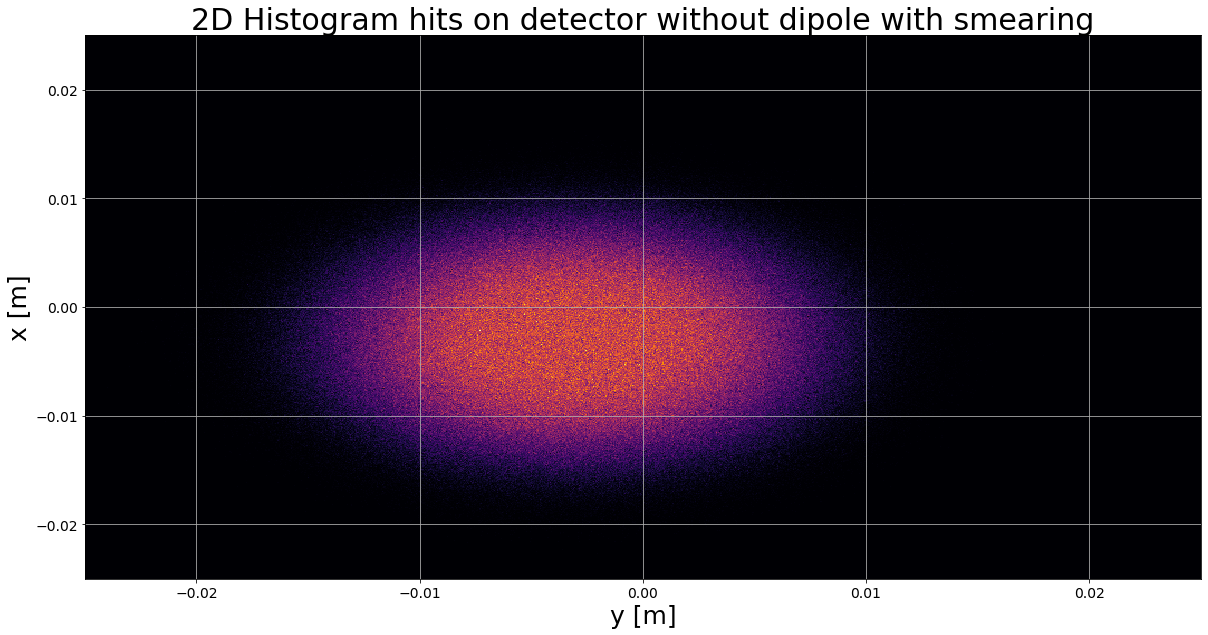

In [62]:
positions = pd.read_csv("data/positions_rotated.csv")

xfin = np.append(np.array(positions["x_mu_rotated"]), np.array(positions["x_anti_mu_rotated"]))
yfin = np.append(np.array(positions["y_mu_rotated"]), np.array(positions["y_anti_mu_rotated"]))

fig, ax = plt.subplots(figsize=(20,10))
ax.hist2d(yfin,xfin,bins=1000,cmap="inferno",range=[[-0.025,0.025],[-0.025,0.025]])
ax.set_xlabel("y [m]",fontsize=25)
ax.set_ylabel("x [m]",fontsize=25)
ax.tick_params(labelsize=14)
ax.set_title("2D Histogram hits on detector without dipole with smearing", fontsize=30)
ax.grid()
plt.show()

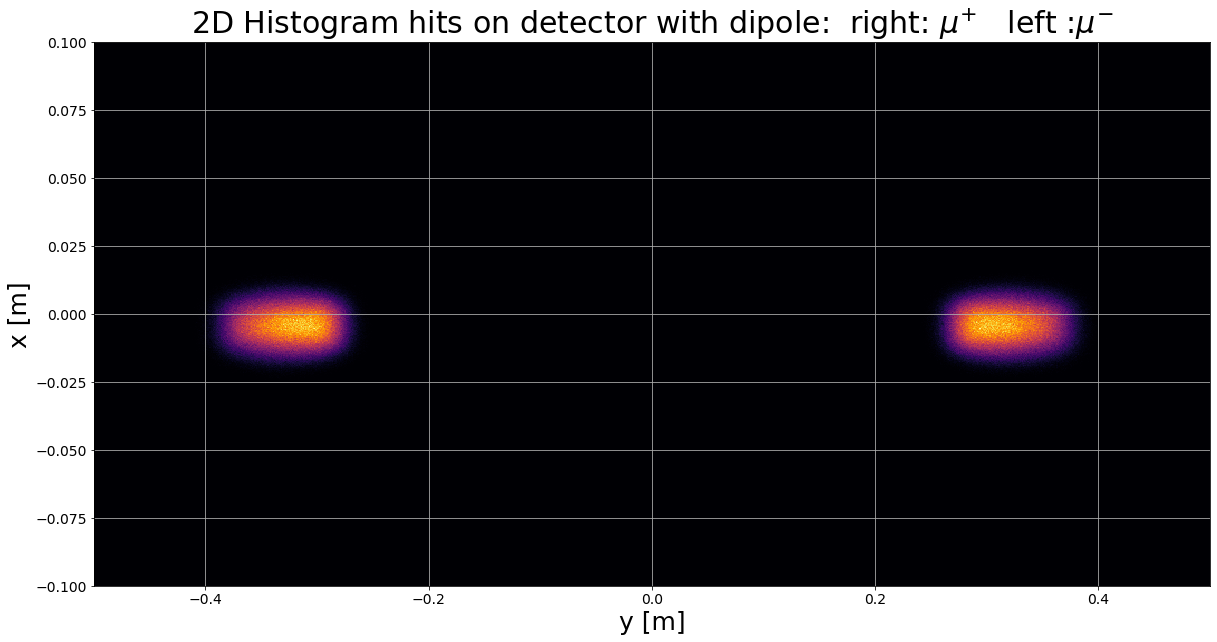

In [63]:
positions_dipole = pd.read_csv("data/positions_dipole_rotated.csv")
xfin = np.append(np.array(positions_dipole["x_mu_rotated"]), np.array(positions_dipole["x_anti_mu_rotated"]))
yfin = np.append(np.array(positions_dipole["y_mu_rotated"]), np.array(positions_dipole["y_anti_mu_rotated"]))

fig, ax = plt.subplots(figsize=(20,10))
ax.hist2d(yfin,xfin,bins=1000,cmap="inferno",range=[[-0.5,0.5],[-0.1,0.1]])
ax.set_xlabel("y [m]",fontsize=25)
ax.set_ylabel("x [m]",fontsize=25)
ax.tick_params(labelsize=14)
ax.set_title(r'2D Histogram hits on detector with dipole:  right: $\mu^{+}$   left :$\mu^{-}$', fontsize=30)
ax.grid()
plt.show()

## Conclusion of smearing:
We can clearly see that the imposition of an angolar smearing in the colliding beam for very small angle does not change substantially the obtained distributions, the shape remain unchanged but we obtained little corrections. In this case we are setting smearing angles normal distribution not in 0 and for this reason we see traslated results. It was made just because it is simplier to check for reasonable results. In a real case the center of the distribution would be set to zero. 

# REFERENCES

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* Main theoretical source : [Michael E. Peskin, Dan V. Schroeder - An Introduction to Quantum Field Theory](https://www.amazon.it/Introduction-Quantum-Field-Theory/dp/0201503972/ref=sr_1_1?__mk_it_IT=%C3%85M%C3%85%C5%BD%C3%95%C3%91&keywords=An+Introduction+To+Quantum+Field+Theory&qid=1574948510&sr=8-1)
* Doane's formula for binning [Doane DP (1976) Aesthetic frequency classification. American Statistician, 30: 181–183
](https://amstat.tandfonline.com/doi/abs/10.1080/00031305.1976.10479172#.Xd_N8nVKhNw)